<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [24]:
import pandas as pd
df = pd.read_csv("amesHousePrice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
df = df.dropna(axis='columns')
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, OneHotEncoder, OrdinalEncoder

X = df.drop(columns='SalePrice')
y = df['SalePrice']

encoder = OrdinalEncoder()
scaler = MinMaxScaler()
#X = X.fillna('unkown')
X = encoder.fit_transform(X)
scaler.fit(X)
X = scaler.transform(X)
#X.head()
X

array([[0.00000000e+00, 3.57142857e-01, 7.50000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       [6.85400960e-04, 0.00000000e+00, 7.50000000e-01, ...,
        2.50000000e-01, 1.00000000e+00, 8.00000000e-01],
       [1.37080192e-03, 3.57142857e-01, 7.50000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       ...,
       [9.98629198e-01, 4.28571429e-01, 7.50000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 8.00000000e-01],
       [9.99314599e-01, 0.00000000e+00, 7.50000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 8.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 7.50000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01]])

In [36]:
X.shape

(1460, 61)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model = Sequential()
model.add(Dense(1,input_dim=61, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['MAE'])
model.fit(X,y, epochs=150)

Epoch 1/150
1460/1460 [==============================] - 0s 247us/sample - loss: -294259.2653 - mean_absolute_error: 180920.3750
Epoch 2/150
1460/1460 [==============================] - 0s 42us/sample - loss: -523360.8346 - mean_absolute_error: 180920.2656
Epoch 3/150
1460/1460 [==============================] - 0s 43us/sample - loss: -752114.8366 - mean_absolute_error: 180920.2188
Epoch 4/150
1460/1460 [==============================] - 0s 44us/sample - loss: -980676.1777 - mean_absolute_error: 180920.1719
Epoch 5/150
1460/1460 [==============================] - 0s 46us/sample - loss: -1209365.6935 - mean_absolute_error: 180920.2031
Epoch 6/150
1460/1460 [==============================] - 0s 42us/sample - loss: -1438197.5955 - mean_absolute_error: 180920.2188
Epoch 7/150
1460/1460 [==============================] - 0s 45us/sample - loss: -1667166.7887 - mean_absolute_error: 180920.2031
Epoch 8/150
1460/1460 [==============================] - 0s 43us/sample - loss: -1895922.4298 - mean

Epoch 64/150
1460/1460 [==============================] - 0s 46us/sample - loss: -14716094.9589 - mean_absolute_error: 180920.2031
Epoch 65/150
1460/1460 [==============================] - 0s 43us/sample - loss: -14944962.8904 - mean_absolute_error: 180920.2031
Epoch 66/150
1460/1460 [==============================] - 0s 43us/sample - loss: -15173750.8000 - mean_absolute_error: 180920.2031
Epoch 67/150
1460/1460 [==============================] - 0s 43us/sample - loss: -15402349.9589 - mean_absolute_error: 180920.1875
Epoch 68/150
1460/1460 [==============================] - 0s 45us/sample - loss: -15631501.1479 - mean_absolute_error: 180920.2031
Epoch 69/150
1460/1460 [==============================] - 0s 43us/sample - loss: -15859953.8411 - mean_absolute_error: 180920.1719
Epoch 70/150
1460/1460 [==============================] - 0s 43us/sample - loss: -16088606.2466 - mean_absolute_error: 180920.2031
Epoch 71/150
1460/1460 [==============================] - 0s 44us/sample - loss: -1

1460/1460 [==============================] - 0s 45us/sample - loss: -28904351.9507 - mean_absolute_error: 180920.2031
Epoch 127/150
1460/1460 [==============================] - 0s 44us/sample - loss: -29133322.6027 - mean_absolute_error: 180920.1719
Epoch 128/150
1460/1460 [==============================] - 0s 43us/sample - loss: -29362097.4027 - mean_absolute_error: 180920.2031
Epoch 129/150
1460/1460 [==============================] - 0s 46us/sample - loss: -29591068.4548 - mean_absolute_error: 180920.2031
Epoch 130/150
1460/1460 [==============================] - 0s 42us/sample - loss: -29820383.5726 - mean_absolute_error: 180920.2031
Epoch 131/150
1460/1460 [==============================] - 0s 46us/sample - loss: -30049103.1123 - mean_absolute_error: 180920.1719
Epoch 132/150
1460/1460 [==============================] - 0s 45us/sample - loss: -30278178.7726 - mean_absolute_error: 180920.1719
Epoch 133/150
1460/1460 [==============================] - 0s 45us/sample - loss: -3050643

In [58]:
model_improved = Sequential(name="3LayerJunk")

model_improved.add(Dense(20, input_dim=61, activation='relu', name="Dense1"))
model_improved.add(Dense(20, activation='relu'))
model_improved.add(Dense(1, activation='relu'))

model_improved.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['MAE'])

# Let's inspect our new architecture
model_improved.summary()

Model: "3LayerJunk"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 20)                1240      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X,y, epochs=150)

Epoch 1/150
1460/1460 [==============================] - 0s 43us/sample - loss: -68952239.1671 - mean_absolute_error: 180920.2188
Epoch 2/150
1460/1460 [==============================] - 0s 44us/sample - loss: -69180942.8274 - mean_absolute_error: 180920.1719
Epoch 3/150
1460/1460 [==============================] - 0s 45us/sample - loss: -69410179.0466 - mean_absolute_error: 180920.1719
Epoch 4/150
1460/1460 [==============================] - 0s 46us/sample - loss: -69638487.8027 - mean_absolute_error: 180920.1719
Epoch 5/150
1460/1460 [==============================] - 0s 42us/sample - loss: -69867712.9205 - mean_absolute_error: 180920.1875
Epoch 6/150
1460/1460 [==============================] - 0s 43us/sample - loss: -70096483.8685 - mean_absolute_error: 180920.2031
Epoch 7/150
1460/1460 [==============================] - 0s 46us/sample - loss: -70325540.0548 - mean_absolute_error: 180920.2031
Epoch 8/150
1460/1460 [==============================] - 0s 43us/sample - loss: -70554647.

1460/1460 [==============================] - 0s 45us/sample - loss: -83139631.5178 - mean_absolute_error: 180920.1719
Epoch 64/150
1460/1460 [==============================] - 0s 44us/sample - loss: -83368639.1452 - mean_absolute_error: 180920.2031
Epoch 65/150
1460/1460 [==============================] - 0s 44us/sample - loss: -83597222.6849 - mean_absolute_error: 180920.1875
Epoch 66/150
1460/1460 [==============================] - 0s 45us/sample - loss: -83826232.5041 - mean_absolute_error: 180920.1875
Epoch 67/150
1460/1460 [==============================] - 0s 45us/sample - loss: -84054979.5288 - mean_absolute_error: 180920.2031
Epoch 68/150
1460/1460 [==============================] - 0s 51us/sample - loss: -84283882.2356 - mean_absolute_error: 180920.1719
Epoch 69/150
1460/1460 [==============================] - 0s 47us/sample - loss: -84512360.3288 - mean_absolute_error: 180920.2031
Epoch 70/150
1460/1460 [==============================] - 0s 46us/sample - loss: -84740994.5863 

1460/1460 [==============================] - 0s 44us/sample - loss: -97329632.4384 - mean_absolute_error: 180920.1719
Epoch 126/150
1460/1460 [==============================] - 0s 45us/sample - loss: -97557984.3945 - mean_absolute_error: 180920.2188
Epoch 127/150
1460/1460 [==============================] - 0s 44us/sample - loss: -97787588.3836 - mean_absolute_error: 180920.2031
Epoch 128/150
1460/1460 [==============================] - 0s 45us/sample - loss: -98016301.7644 - mean_absolute_error: 180920.2031
Epoch 129/150
1460/1460 [==============================] - 0s 44us/sample - loss: -98245196.0110 - mean_absolute_error: 180920.2031
Epoch 130/150
1460/1460 [==============================] - 0s 43us/sample - loss: -98473979.0466 - mean_absolute_error: 180920.1719
Epoch 131/150
1460/1460 [==============================] - 0s 44us/sample - loss: -98702755.9233 - mean_absolute_error: 180920.2188
Epoch 132/150
1460/1460 [==============================] - 0s 43us/sample - loss: -9893155

In [60]:
scores = model_improved.evaluate(X,y)
print(f"{model_improved.metrics_names[1]}: {scores[1]}")

1460/1460 [==============================] - 0s 120us/sample - loss: 1145033.8623 - mean_absolute_error: 180921.1250
mean_absolute_error: 180921.125


In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8459578047231604

In [63]:
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X)

mean_absolute_error(y, y_pred)

19684.598211785884

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [82]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [95]:
y_train.shape

(60000,)

In [83]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [87]:
import tensorflow as tf

model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [88]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [92]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 784)

Using TensorFlow backend.









> 91.033
> 91.367
> 90.850
> 91.208
> 91.367


KeyError: 'accuracy'

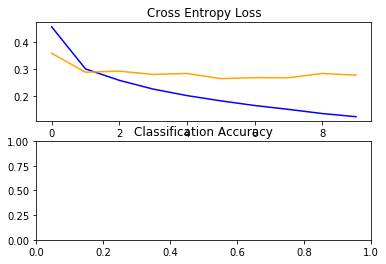

In [96]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

> 90.950
> 91.133
> 91.500
> 91.067
> 91.392


KeyError: 'accuracy'

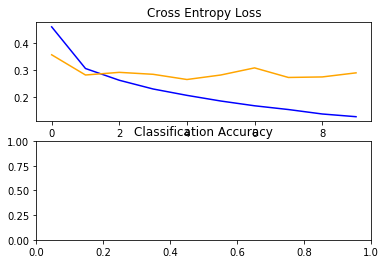

In [97]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.